In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFECV


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')



In [207]:
#Project-FIFA_MoneyBall

In [208]:
# Pridicting the value of a player using a linear regression model

In [209]:
#Importing and cleaning the data 


In [210]:
fifa = pd.read_csv('C:/Users/shili/Desktop/DataAnalytics/fifa21_male2.csv')

In [211]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [212]:
fifa.tail()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020","Jun 30, 2021",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2 ★,2★,Medium,Medium,1 ★,54,30,37,48,64,69,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,10,"Aug 20, 2020",NaN,€130K,€3K,€273K,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3 ★,2★,Medium,Medium,1 ★,62,46,57,56,43,55,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,11,"Aug 20, 2020",NaN,€130K,€2K,€273K,2020 ~ 2022,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,3 ★,2★,Medium,Medium,1 ★,63,35,44,52,54,55,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,11,"Sep 30, 2020",NaN,€475K,€3K,€784K,2020 ~ 2023,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,4 ★,2★,High,Medium,1 ★,71,34,58,59,59,54,5,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,56+2,55+2,55+2,55+2,56+2,60+2,58+2,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male
17124,259105,Pablo Rodríguez,18,59,Spain,Lecce,61,ST,ST,https://cdn.sofifa.com/players/259/105/20_120.png,https://cdn.sofifa.com/teams/347/light_60.png,https://cdn.sofifa.com/flags/es.png,74,Lecce 2020 ~ 2024,"5'10""",154lbs,Right,15,"Sep 30, 2020",NaN,€325K,€2K,€788K,2020 ~ 2024,254,32,64,59,45,54.0,235,57,45.0,48,30,55,317,68,72,59.0,53,65.0,288,58,62.0,55,52,61,224,32,11.0,64.0,50.0,67,57.0,35,12,12,11.0,48,5,10,9,15,9,1401,295,3 ★,3★,High,Medium,1 ★,70,62,41,57,16,49,4,59+2,59+2,59+2,56+0,58+0,58+0,58+0,56+0,55+2,55+2,55+2,53+2,46+2,46+2,46+2,53+2,36+2,32+2,32+2,32+2,36+2,34+2,30+2,30+2,30+2,34+2,14+2,Male


In [213]:
#stardize columns
fifa.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [214]:
#Removing columns that are not to be used in the analysis 
df = fifa.drop(['player_photo','club_logo','flag_photo','team_&_contract','position','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm', 'rdm','rwb','lb','lcb','cb','rcb','rb','gk'], axis=1)

In [215]:
fifa.columns


Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [216]:
# Limiting the number of rows and coumns to be shown
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

In [217]:
# shape of the data 
fifa.shape


(17125, 107)

In [218]:
# Number of postions held by players
fifa['position'].value_counts()


CB               2047
ST               1818
GK               1517
CDM CM            748
LB                654
                 ... 
GK RB               1
CF RM RW            1
RB LM               1
CM CAM RW RM        1
CDM CM RM RWB       1
Name: position, Length: 622, dtype: int64

In [219]:
fifa['position'].unique()

array(['LM', 'CM CAM CDM', 'CAM RM RW LM', nan, 'CM CAM', 'RW RM',
       'CM CDM', 'LM CM CAM', 'RB CB RWB', 'CDM CM RB', 'CM RM', 'ST',
       'GK', 'CDM LB LM', 'RM RB CM', 'ST CAM', 'CB', 'RM', 'CF ST',
       'CAM', 'CDM CM', 'CF ST CAM LW', 'LB', 'LM ST', 'CM RM RB',
       'LM CAM', 'CDM CM RM', 'CM', 'RB', 'ST CF', 'CM CDM CAM', 'RW',
       'CM CDM LM CAM', 'LWB LM LB LW', 'CF', 'CAM CM RM', 'RM CAM',
       'LM CAM RM', 'ST CF RW', 'CDM CM RM RWB', 'CM CDM ST', 'CAM CM',
       'RM LM', 'CAM LM', 'ST LW', 'CDM', 'CF CAM ST', 'CB CDM', 'CAM ST',
       'CAM LB', 'CM CAM RM CDM', 'CAM CF RW', 'CAM RW', 'LM RM',
       'CAM LW', 'CF ST CAM', 'CB LB', 'CAM ST CM', 'RM LM CDM',
       'LM RM ST', 'LB LM CM', 'RM RW', 'CDM CAM', 'CAM LM RM',
       'LW LM ST', 'CF ST RW CAM', 'CAM RM LM ST', 'ST CAM LM',
       'ST CF CAM', 'RB CDM CM', 'RB CM', 'CDM CB', 'CAM CF', 'CB RB',
       'LW CAM', 'ST RW', 'ST LM', 'CM RB LB', 'LB LWB', 'LW RW', 'RB LB',
       'CAM LM CM', 'ST RW CAM RM'

In [220]:
list(fifa.columns)


['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [221]:
fifa.dtypes

id                    int64
name                 object
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
player_photo         object
club_logo            object
flag_photo           object
pot                   int64
team_&_contract      object
height               object
weight               object
foot                 object
growth                int64
joined               object
loan_date_end        object
value                object
wage                 object
release_clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control        

In [222]:
fifa.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    id                int64  
 1    name              object 
 2    age               int64  
 3    ova               int64  
 4    nationality       object 
 5    club              object 
 6    bov               int64  
 7    bp                object 
 8    position          object 
 9    player_photo      object 
 10   club_logo         object 
 11   flag_photo        object 
 12   pot               int64  
 13   team_&_contract   object 
 14   height            object 
 15   weight            object 
 16   foot              object 
 17   growth            int64  
 18   joined            object 
 19   loan_date_end     object 
 20   value             object 
 21   wage              object 
 22   release_clause    object 
 23   contract          object 
 24   attacking         int64  
 25   crossing          in

In [223]:
#Null values in ech columns 
fifa.isnull().sum()

id                      0
name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed

In [224]:
# Unique values in each columns 
n= fifa.nunique(axis = 0)
print(n)

id                  17125
name                16176
age                    30
ova                    50
nationality           167
club                  917
bov                    50
bp                     15
position              622
player_photo        17125
club_logo             918
flag_photo            167
pot                    47
team_&_contract      9822
height                 21
weight                 57
foot                    2
growth                 28
joined               1953
loan_date_end          38
value                 216
wage                  142
release_clause       1200
contract              434
attacking             366
crossing               89
finishing              93
heading_accuracy       89
short_passing          86
volleys                87
skill                 390
dribbling              91
curve                  91
fk_accuracy            90
long_passing           84
ball_control           91
movement              329
acceleration           86
sprint_speed

In [225]:
# Unique names on the column name 
n = len(pd.unique(fifa["name"]))
print(n)

16176


Text(0.5, 1.0, 'Histogram of Age')

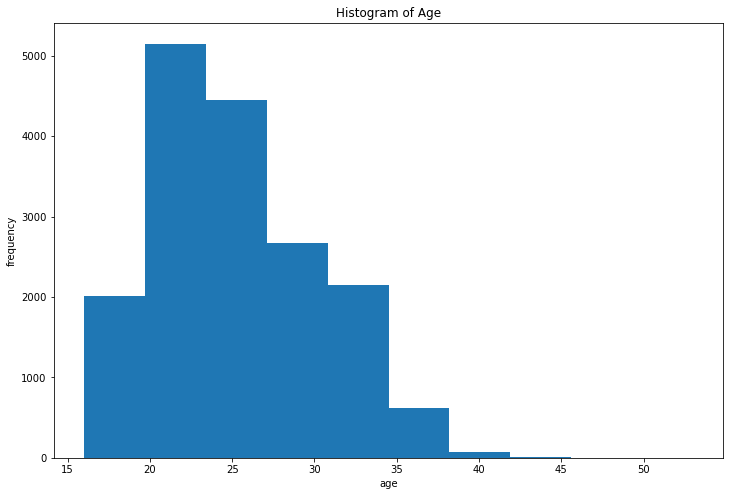

In [226]:
# age catagory of players 
plt.figure(figsize = (12,8))
plt.hist(fifa["age"])
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Histogram of Age")

In [230]:
fifa_ova = fifa.sort_values(by='ova',ascending=False)
fifa_ova

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,Male
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male
...,...,...,

In [232]:
fifa_top_ten = fifa_ova.head(10)
fifa_top_ten

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,Male
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male
3665,200389,

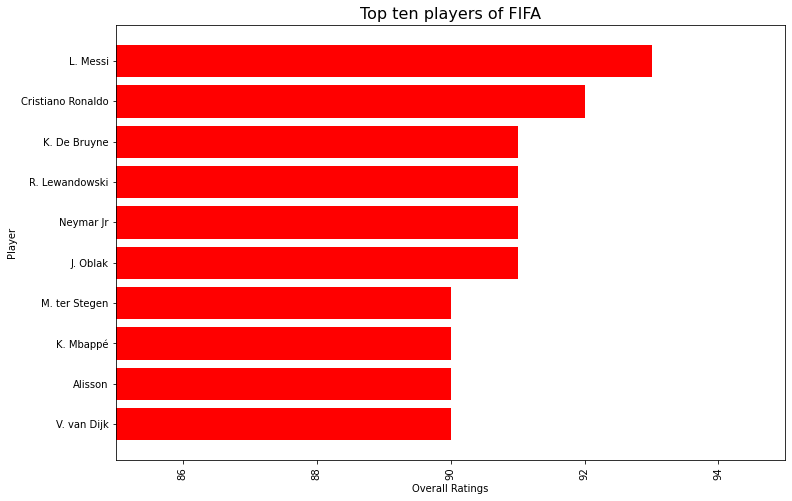

In [234]:
plt.figure(figsize = (12,8))
plt.barh("name", "ova", data = fifa_top_ten, color = "red")
plt.xlim((85,95))
plt.xticks(rotation = 90)
plt.gca().invert_yaxis()
plt.ylabel("Player")
plt.xlabel("Overall Ratings")
plt.title("Top ten players of FIFA", fontsize = 16);